# 1. PyKoSpacing
## 전희원님이 개발한 PyKoSpacing은 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지입니다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있습니다.![캡처.JPG](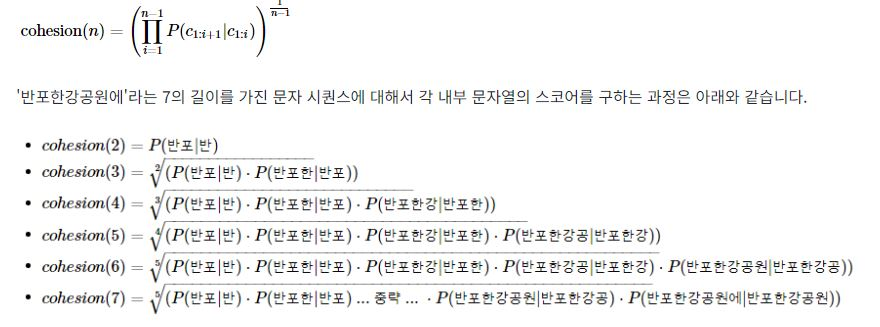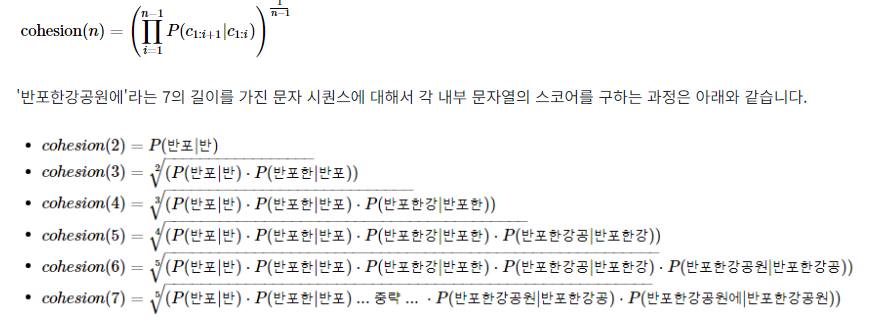)

In [ ]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-kkpdxz39
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-kkpdxz39
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 39.5 MB/s eta 

In [ ]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [ ]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [ ]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent)
print(kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


# 2. SOYNLP를 이용한 단어 토큰화
## soynlp는 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저입니다. 비지도 학습으로 단어 토큰화를 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 단어로 분석합니다. soynlp 단어 토크나이저는 내부적으로 단어 점수 표로 동작합니다. 이 점수는 응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)를 활용합니다.

In [ ]:
pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 21.9 MB/s eta 0:00:00


In [ ]:
# 1. 신조어 문제
# 기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못하는 단점이 있었습니다.

from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

# 에이비식스: 아이돌 이름 / 이대휘: 아이돌 멤버 이름 / 최애돌: 최고로 애정하는 캐릭터

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


In [ ]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [ ]:
# 2. 학습하기
# soynlp는 기본적으로 학습에 기반한 토크나이저이므로 학습에 필요한 한국어 문서를 다운로드

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7e400e700dc0>)

In [ ]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [ ]:
# 총 3만 91개의 문서가 존재합니다. 상위 3개의 문서만 출력해봅시다. 지면의 한계로 중략하였습니다.
i = 0

for document in corpus:
    if len(document) > 0:
        print(document)
        i = i + 1
    if i == 3:
        break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [ ]:
# soynlp는 학습 기반의 단어 토크나이저이므로 기존의 KoNLPy에서 제공하는 형태소 분석기들과는 달리 학습 과정을 거쳐야 합니다.
# 이는 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정입니다.
# WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산합니다.

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.523 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


## SoyNLP의 응집 확률 (cohesion probability)
### 응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도입니다. 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값입니다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 수식은 아래와 같습니다.


In [ ]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [ ]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [ ]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [ ]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [ ]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

## SoyNLP의 브랜칭 엔트로피 (branching entropy)
### Branching Entropy는 확률 분포의 엔트로피값을 사용합니다. 이는 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도입니다. 브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도로 비유해봅시다. 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 점점 줄어드는 양상을 보입니다.

In [ ]:
word_score_table["디스"].right_branching_entropy

# '디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가짐.

1.6371694761537934

In [ ]:
word_score_table["디스플"].right_branching_entropy

# '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가짐

-0.0

In [ ]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [ ]:
word_score_table["디스플레이"].right_branching_entropy

# '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문에

3.1400392861792916

## SoyNLP의 L tokenizer
### 한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많습니다. 왼쪽에 오는 L 토큰은 체언(명사, 대명사)이나 동사, 형용사 등이고 오른쪽에 오는 R 토큰은 조사, 동사, 형용사 등 입니다. 예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. L 토크나이저는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가지고 있습니다.

In [ ]:
from soynlp.tokenizer import LTokenizer

scores = {word: score.cohesion_forward for word, score in word_score_table.items()}

l_tokenizer = LTokenizer(scores = scores)
l_tokenizer.tokenize('국제사회와 우리의 노력들로 범죄를 척결하자', flatten = False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

## 최대 점수 토크나이저
### 최대 점수 토크나이저는 띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저입니다. 띄어쓰기가 되어 있지 않은 문장을 넣어서 점수를 통해 토큰화 된 결과를 보겠습니다.

In [ ]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

## SOYNLP를 이용한 반복되는 문자 정제

In [ ]:
from soynlp.normalizer import *

In [ ]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [ ]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


## Customized KoNLPy
### '은경이'는 사람 이름이므로 제대로 된 결과를 얻기 위해서는 '은', '경이'와 같이 글자가 분리되는 것이 아니라 '은경이' 또는 최소한 '은경'이라는 단어 토큰을 얻어야만 합니다. 이런 경우에는 형태소 분석기에 사용자 사전을 추가해줄 수 있습니다. '은경이'는 하나의 단어이기 때문에 분리하지말라고 형태소 분석기에 알려주는 것입니다.사용자 사전을 추가하는 방법은 형태소 분석기마다 다른데, 생각보다 복잡한 경우들이 많습니다. 이번 실습에서는 Customized Konlpy라는 사용자 사전 추가가 매우 쉬운 패키지를 사용합니다.

In [ ]:
pip install customized_konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.5/881.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
# customized_konlpy에서 제공하는 형태소 분석기 Twitter를 사용하여 단어 토큰화 진행
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다.')

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [ ]:
twitter.add_dictionary('은경이', 'Noun')

In [ ]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']